# 평균 제곱 오차 (Mean Squared Error, MSE)

**평균 제곱 오차(MSE)**는 예측값과 실제값 사이의 차이(오차)를 제곱하여 평균을 낸 값임. 회귀 문제에서 모델의 성능을 측정하는 대표적인 손실 함수(Loss Function) 또는 평가지표로 사용됨.

MSE는 오차의 크기에 민감하며, 값이 작을수록 모델의 예측이 실제값에 가깝다는 것을 의미함. 모델 학습 과정에서 이 MSE 값을 최소화하는 방향으로 가중치를 업데이트함.

### 📐 수학적 배경

n개의 데이터에 대해 실제값 $y$와 모델의 예측값 $\hat{y}$가 있을 때, MSE는 다음과 같이 정의됨.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$

* $n$: 전체 데이터의 개수
* $y_i$: i번째 데이터의 실제값
* $\hat{y}_i$: i번째 데이터에 대한 모델의 예측값

### 셋업 (Setup)
계산 및 시각화를 위한 라이브러리 임포트.

In [11]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
개념 설명을 위한 간단한 실제값(y_true)과 예측값(y_pred)을 생성함.

In [12]:
# 실제값: y = 2x + 1 형태의 선형 데이터
X = np.array([1, 2, 3, 4, 5])
y_true = 2 * X + 1  # 실제값 계산


# 모델이 예측했다고 가정하는 값 (약간의 오차 포함)
y_pred = np.array([2.5, 5.2, 8.0, 8.5, 11.3])

print(f"입력 데이터(X): {X}")
print(f"실제값(y_true): {y_true}")
print(f"예측값(y_pred): {y_pred}")

입력 데이터(X): [1 2 3 4 5]
실제값(y_true): [ 3  5  7  9 11]
예측값(y_pred): [ 2.5  5.2  8.   8.5 11.3]


### 핵심 로직 구현 (Code Implementation)
MSE 계산 과정을 단계별로 나누어 구현함.

In [13]:
# Step 1: 각 데이터 포인트의 오차(error) 계산 (y_true - y_pred)
errors = y_true - y_pred

print(f"오차 (errors): shape={errors.shape}\n{errors}")

오차 (errors): shape=(5,)
[ 0.5 -0.2 -1.   0.5 -0.3]


In [14]:
# Step 2: 오차를 제곱 (squared errors)
# 이유: 오차의 부호(+, -)를 없애고, 큰 오차에 더 큰 패널티를 부여하기 위함.
squared_errors = errors ** 2

print(f"제곱된 오차 (squared_errors): shape={squared_errors.shape}\n{squared_errors}")

제곱된 오차 (squared_errors): shape=(5,)
[0.25 0.04 1.   0.25 0.09]


In [ ]:
# Step 3: 제곱된 오차의 산술 평균(mean) 계산
mse_value = np.mean(squared_errors)

print(f"최종 MSE 값: {mse_value:.4f}")

최종 MSE 값: 0.3260


#### 함수로 전체 과정 통합
위 과정을 하나의 함수로 만들어 사용.

In [16]:
def mean_squared_error(y_true, y_pred):
    """Numpy를 사용하여 MSE를 계산하는 함수"""
    # 로직의 명확성을 위해 한 줄로 표현
    return np.mean((y_true - y_pred) ** 2)

# 함수를 사용하여 MSE 계산
mse_by_function = mean_squared_error(y_true, y_pred)

print(f"함수로 계산한 MSE: {mse_by_function:.4f}")

함수로 계산한 MSE: 0.3260


### 📊 결과 확인 및 시각화 (Results & Visualization)
실제값과 예측값, 그리고 그 사이의 오차를 시각화하여 MSE의 의미를 직관적으로 이해함.

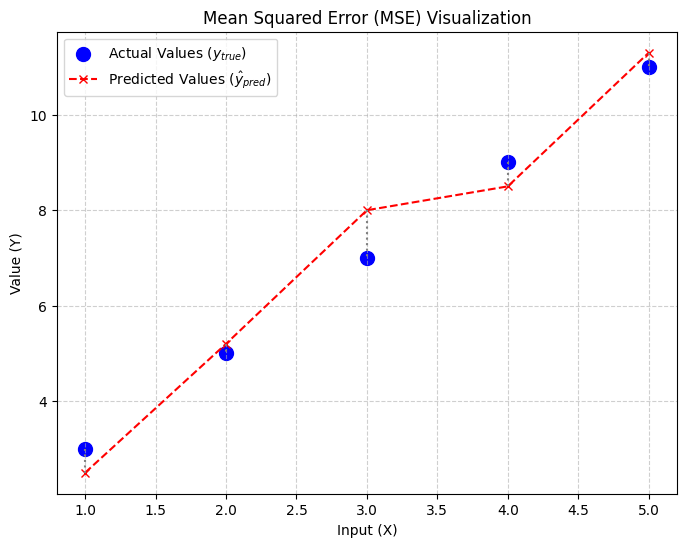

In [17]:
plt.figure(figsize=(8, 6))

# 실제값(파란색 점)과 예측값(빨간색 선)을 그래프에 표시
plt.scatter(X, y_true, color='blue', label='Actual Values ($y_{true}$)', s=100) # s는 점의 크기
plt.plot(X, y_pred, color='red', marker='x', linestyle='--', label='Predicted Values ($\hat{y}_{pred}$)')

# 각 데이터 포인트의 오차를 회색 점선으로 표시
for i in range(len(X)):
    plt.vlines(X[i], ymin=y_pred[i], ymax=y_true[i], color='gray', linestyle=':')

plt.title('Mean Squared Error (MSE) Visualization')
plt.xlabel('Input (X)')
plt.ylabel('Value (Y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 고려사항 (Considerations)

* **이상치(Outlier)에 대한 민감도**: 오차를 제곱하기 때문에, 다른 값들에 비해 유난히 큰 오차(이상치)가 발생하면 MSE 값이 크게 증가함. 이는 모델이 이상치에 과도하게 영향을 받도록 만들 수 있음.
* **단위 해석의 어려움**: MSE는 실제값의 단위를 제곱한 형태(예: 가격을 예측하는 경우 '원²')가 되므로 직관적인 해석이 어려울 수 있음. 이런 경우 MSE에 제곱근을 씌운 **RMSE(Root Mean Squared Error)**를 사용하면 단위가 일치하여 해석이 용이해짐.

### 최종 요약 (Conclusion)

평균 제곱 오차(MSE)는 회귀 모델의 예측이 얼마나 정확한지를 나타내는 핵심 지표임. 실제값과 예측값의 차이를 제곱하여 평균을 내는 간단한 방식으로 계산됨.

이 노트북에서는 MSE의 계산 과정을 단계별로 구현하고, 시각화를 통해 오차가 어떻게 MSE 값에 반영되는지 확인함. MSE는 그 값이 작을수록 좋으며, 머신러닝 모델은 학습 과정에서 이 MSE를 최소화하는 것을 목표로 함.